In [2]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scienceplots
%matplotlib widget
import pickle
plt.style.use(['science', 'nature'])

In [4]:
coverage_data_list = glob.glob("/root/apabenchmark/data/coverage/*.txt")

In [5]:
coverage_data_df = pd.DataFrame(coverage_data_list, columns=["file_path"])
coverage_data_df["protocol"] = coverage_data_df["file_path"].str.split("/", expand=True)[5].str.split("_", expand=True)[0]
coverage_data_df["is_sim"] = coverage_data_df["file_path"].str.split("/", expand=True)[5].str.contains("rep")
coverage_data_df["tissue"] = coverage_data_df["file_path"].str.split("/", expand=True)[5].str.split("_", expand=True)[2]

In [9]:
raw_coverage_data = {}
for index, row in coverage_data_df[~coverage_data_df["is_sim"]].iterrows():
    if row["protocol"] not in raw_coverage_data.keys():
        raw_coverage_data[row["protocol"]] = pd.DataFrame()
    raw_coverage_data[row["protocol"]] = pd.concat([raw_coverage_data[row["protocol"]], pd.read_csv(row["file_path"], sep="\t")])

In [7]:
# sim_coverage_data = {}
# for index, row in coverage_data_df[coverage_data_df["is_sim"]].iterrows():
#     if row["protocol"] not in sim_coverage_data.keys():
#         sim_coverage_data[row["protocol"]] = pd.DataFrame()
#     sim_coverage_data[row["protocol"]] = pd.concat([sim_coverage_data[row["protocol"]], pd.read_csv(row["file_path"], sep="\t")])

In [11]:
coverage_df = pd.DataFrame()
for protocol in raw_coverage_data.keys():
    raw_coverage_df = raw_coverage_data[protocol]
    raw_coverage_df = raw_coverage_df.set_index("Percentile")

    # sim_coverage_df = sim_coverage_data[protocol]
    # sim_coverage_df = sim_coverage_df.set_index("Percentile")

    raw_coverage_df_normalized = raw_coverage_df / raw_coverage_df.sum(axis=1).to_numpy().reshape(-1, 1)
    # sim_coverage_df_normalized = sim_coverage_df / sim_coverage_df.sum(axis=1).to_numpy().reshape(-1, 1)
    # coverage_df_normalized = coverage_df_normalized.mean(axis=0)
    raw_coverage_df_normalized  = raw_coverage_df_normalized.melt(var_name="Percentile", value_name="Coverage",ignore_index=False).reset_index(names="sample")
    # sim_coverage_df_normalized  = sim_coverage_df_normalized.melt(var_name="Percentile", value_name="Coverage",ignore_index=False).reset_index(names="sample")
    raw_coverage_df_normalized["type"] = "raw"
    # sim_coverage_df_normalized["type"] = "sim"
    raw_coverage_df_normalized["protocol"] = protocol
    # sim_coverage_df_normalized["protocol"] = protocol
    
    # coverage_df = pd.concat([coverage_df, raw_coverage_df_normalized, sim_coverage_df_normalized])
    coverage_df = pd.concat([coverage_df, raw_coverage_df_normalized])
    # print(protocol)
    # sns.lineplot(data=sns_plot_data, x="Percentile", y="Coverage", hue="type")
    # plt.show()


In [12]:

with open("/root/apabenchmark/data/tmp/coverage_df.pickle", "wb") as f:
    pickle.dump(coverage_df, f)

In [28]:
with open("/root/apabenchmark/data/tmp/coverage_df.pickle", "rb") as f:
    coverage_df = pickle.load(f)

In [41]:
protocol_map = {
    "Visium": "10X Visium",
    "VisiumHD": "10X Visium HD",
    "Chromium": "10X Chromium",
    "Dropseq": "Drop-seq",
    "Stereoseq": "Stereo-seq",
    "Slideseq": "Slide-seq V2",
    "SpatialTranscriptomics": "Spatial Transcriptomics",
    "Microwell": "Microwell-seq",
}
col_order = ["10X Chromium", "Drop-seq", "Microwell-seq", "10X Visium", "Stereo-seq", "Slide-seq V2", "Spatial Transcriptomics"]
# col_order = ["10X Chromium", "Drop-seq", "Microwell-seq", "10X Visium", "Stereo-seq", "Slide-seq V2", "Spatial Transcriptomics"]

In [33]:
coverage_df["protocol"] = coverage_df["protocol"].map(protocol_map)

In [14]:
mm = 1/25.4
width = 170
height = width / 1.618

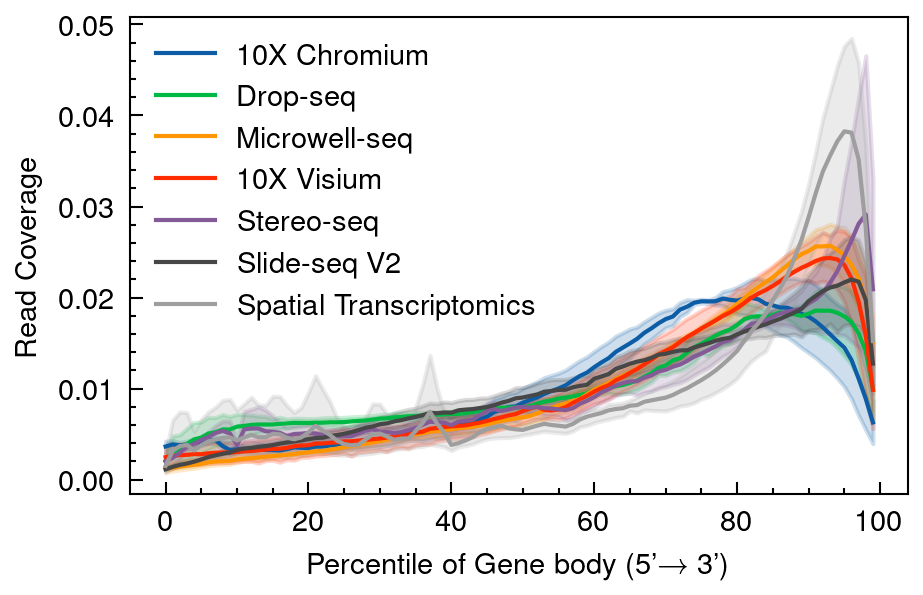

In [42]:
# colors = [
#     "#4578a5",  # 蓝色
#     "#45b970",  # 橙色
#     "#ffbc5f",  # 红色
#     "#85b6b2",  # 青色
#     "#ff7a5f",  # 绿色
#     "#474747",  # 黄色
#     "#9e9e9e",  # 紫色
#     "#f1a2a9",  # 粉色
# ]

plt.figure(figsize=(width*mm/2,height*mm/2), dpi=300)
g = sns.lineplot(
    data=coverage_df[(coverage_df["type"]=="raw")],
    x="Percentile",
    y="Coverage",
    hue="protocol",
    hue_order = col_order,
    # palette=colors,
)
xticks = range(0, 101, 20)
(g.tick_params(which='both', top=False, right=False)
 )
g.set_xticks(xticks)
g.set_xticklabels(xticks)
plt.ylabel("Read Coverage")
plt.xlabel("Percentile of Gene body (5'→ 3')")
plt.legend(title="")
plt.show()
plt.savefig("../plot/genebody_coverage.pdf", bbox_inches='tight')

In [24]:
plt.savefig("../plot/genebody_coverage.svg", bbox_inches='tight')